In [1]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [2]:
store_data = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/store.csv')
test_data = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/test.csv')
train_data = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/train.csv')

C:\Users\Naim\AppData\Local\Temp\ipykernel_18960\2421178098.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/train.csv')


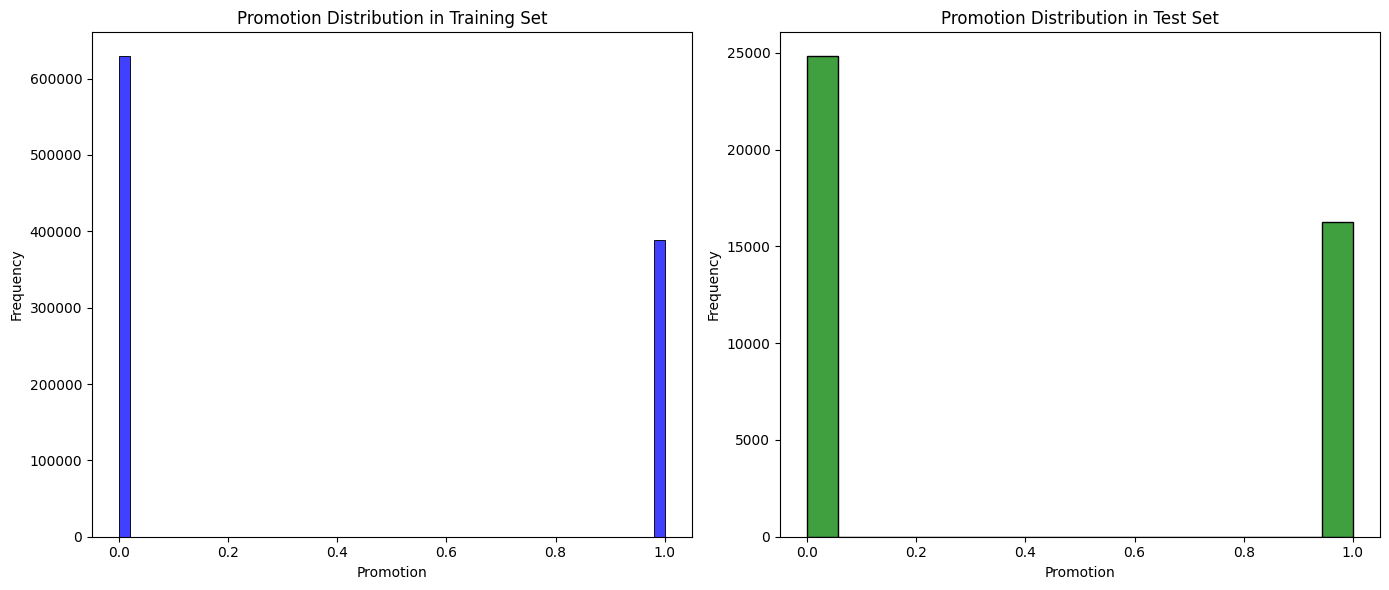

Training Set Promotion Distribution (Normalized):
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set Promotion Distribution (Normalized):
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64

Percentage Difference in Promotion Distribution:
 Promo
0    0.014319
1    0.014319
Name: proportion, dtype: float64


In [3]:

from rossmann_store_salesanlysis import check_promotion_distribution

# Assuming the promotion information is stored in a column named 'Promotion'
promotion_column = 'Promo'

# Call the function to check the distribution of promotions
check_promotion_distribution(train_data, test_data, promotion_column)


In [4]:
from rossmann_store_salesanlysis import merge_train_store
# Merge the datasets
merged_data = merge_train_store(train_data, store_data)

# Display the merged dataset
print(merged_data.head())

# Optionally, save the merged dataset to a new CSV file
# merged_data.to_csv('merged_train_store_data.csv', index=False)

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [8]:
merged_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
HolidayPeriod                0
dtype: int64

In [9]:
from rossmann_store_salesanlysis import clean_missing_values
# Clean the missing values
cleaned_data = clean_missing_values(merged_data)

# Verify if there are any remaining missing values
print(cleaned_data.isnull().sum())

# Display the first few rows of the cleaned data
print(cleaned_data.head())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
HolidayPeriod                0
dtype: int64
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5

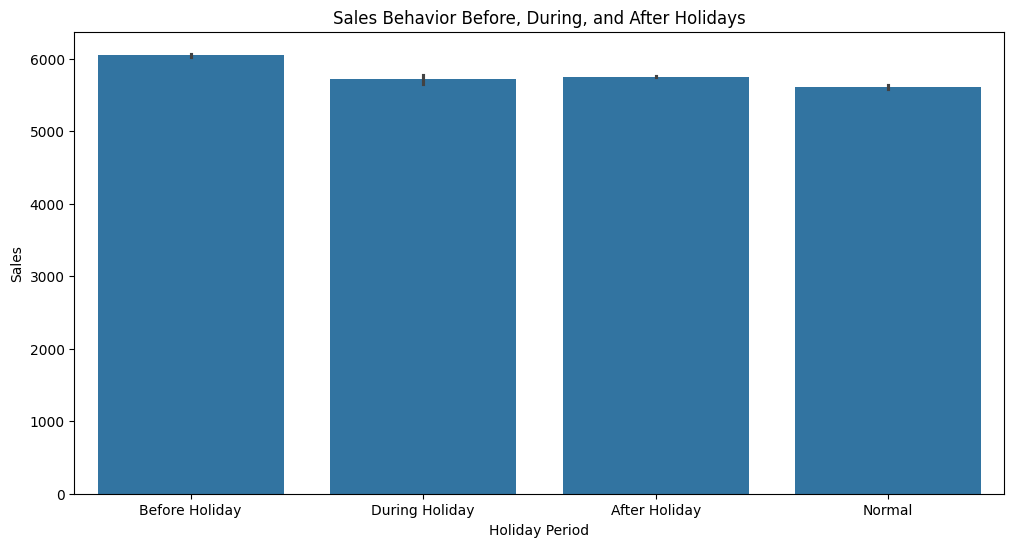


Sales Behavior Summary by Holiday Period:
                        mean  median          std   count
HolidayPeriod                                           
After Holiday   5755.901408  5741.0  3758.938917  785620
Before Holiday  6046.770188  5903.0  4156.324488  114015
During Holiday  5715.866925  5797.5  4754.746567   22694
Normal          5608.041442  5579.0  3952.771176   94880


In [10]:
from rossmann_store_salesanlysis import sales_behavior_holidays_auto
# Specify the sales and date columns
sales_column = 'Sales'  
date_column = 'Date'   

# Specify the holiday columns
state_holiday_column = 'StateHoliday'  
school_holiday_column = 'SchoolHoliday' 

# Call the function to compare sales behavior before, during, and after holidays
sales_behavior_holidays_auto(merged_data, sales_column, date_column, state_holiday_column, school_holiday_column, days_before=7, days_after=7)



In [11]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,After Holiday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",After Holiday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",After Holiday
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None,After Holiday
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None,After Holiday


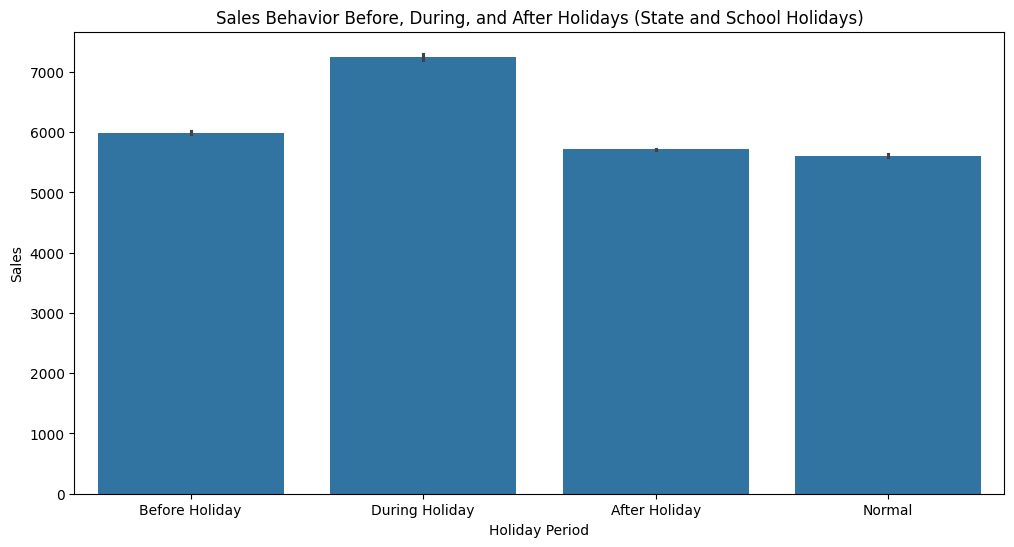


Sales Behavior Summary by Holiday Period:
                        mean  median          std   count
HolidayPeriod                                           
After Holiday   5713.999026  5704.0  3749.198227  770155
Before Holiday  5992.458777  5935.0  4226.153317  129479
During Holiday  7249.489359  6927.0  4174.105084   22695
Normal          5608.041442  5579.0  3952.771176   94880


In [12]:
from rossmann_store_salesanlysis import sales_behavior_holidays_extended
# Specify the sales, date, StateHoliday, and SchoolHoliday columns
sales_column = 'Sales'  # Replace with the actual column name for sales
date_column = 'Date'    # Replace with the actual column name for dates
state_holiday_column = 'StateHoliday'  # Replace with the column that indicates state holidays
school_holiday_column = 'SchoolHoliday'  # Replace with the column that indicates school holidays

# Call the function to compare sales behavior before, during, and after holidays
sales_behavior_holidays_extended(merged_data, sales_column, date_column, state_holiday_column, school_holiday_column, days_before=7, days_after=7)


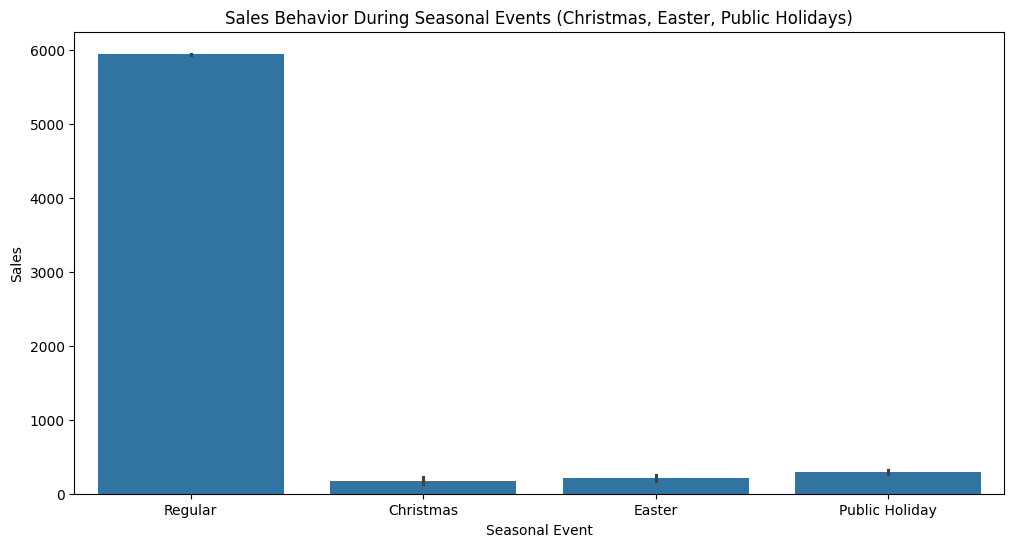


Sales Behavior Summary by Season:
                        mean  median          std   count
Season                                                  
Christmas        168.733171     0.0  1492.274865    4100
Easter           214.311510     0.0  1816.918138    6690
Public Holiday   290.735686     0.0  1870.281698   20260
Regular         5947.483893  5849.0  3767.890619  986159


In [13]:
from rossmann_store_salesanlysis import seasonal_purchase_behavior
sales_column = 'Sales'  # Replace with the actual column name for sales
date_column = 'Date'    # Replace with the actual column name for dates
state_holiday_column = 'StateHoliday'  # Replace with the column that indicates state holidays

# Call the function to analyze seasonal purchase behaviors
seasonal_purchase_behavior(merged_data, sales_column, date_column, state_holiday_column)


Correlation between Sales and Customers: 0.8947


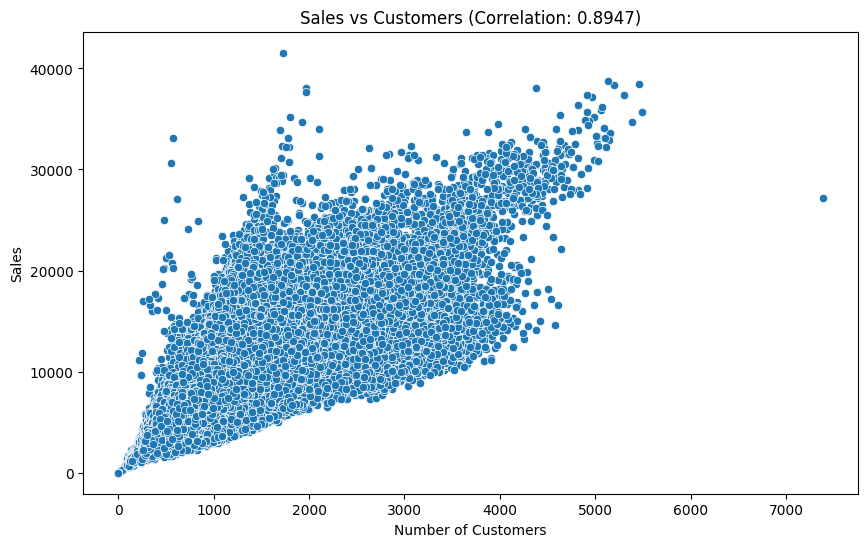

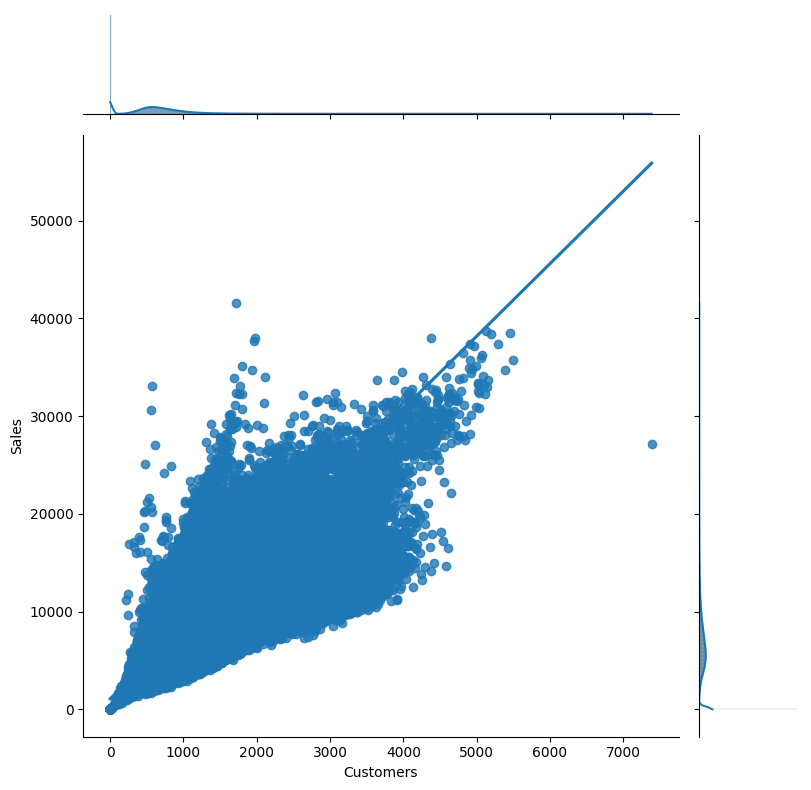

In [14]:
from rossmann_store_salesanlysis import analyze_sales_customers_correlation
sales_column = 'Sales' 
customers_column = 'Customers'

# Call the function to analyze correlation between sales and customers
analyze_sales_customers_correlation(merged_data, sales_column, customers_column)


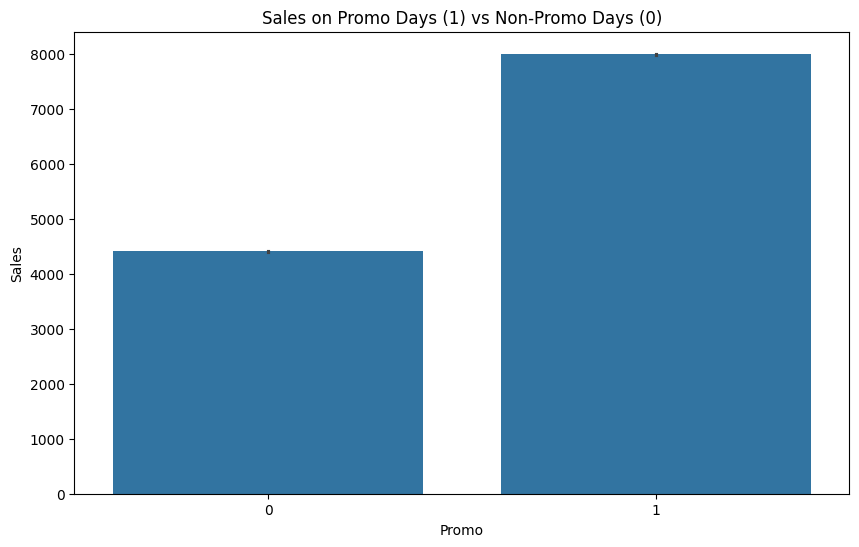

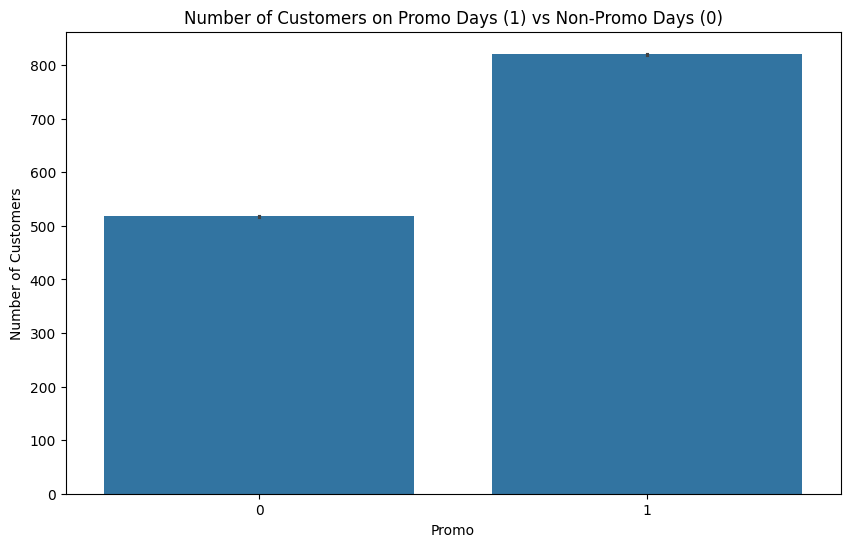

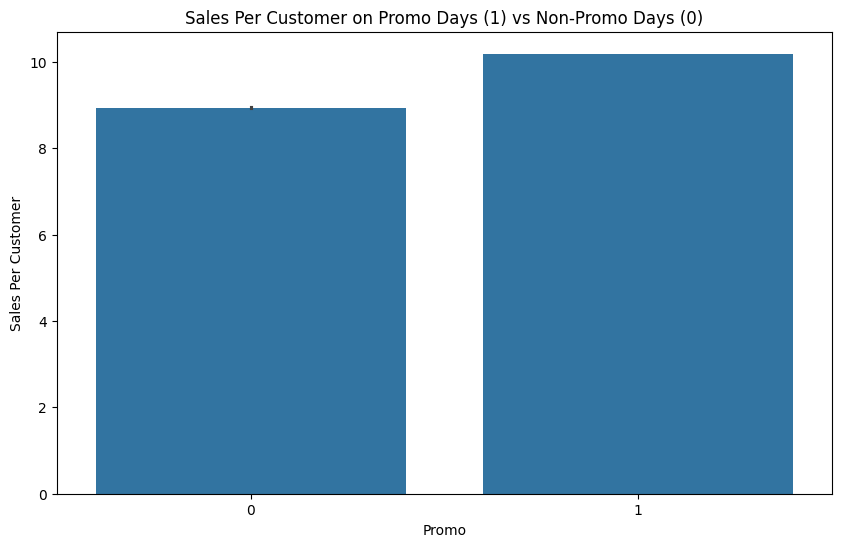


Promo Effect Summary (Sales, Customers, Sales Per Customer):
              Sales                                Customers         \
              mean  median          std   count        mean median   
Promo                                                                
0      4406.050805  4622.0  3442.450020  629129  517.823542  512.0   
1      7991.152046  7553.0  3419.025495  388080  820.098815  747.0   

                          SalesPerCustomer                              
              std   count             mean    median       std   count  
Promo                                                                   
0      452.881419  629129         8.941128  8.741597  1.973870  467463  
1      419.897191  388080        10.178907  9.956947  2.266669  376877  


In [15]:
from rossmann_store_salesanlysis import analyze_promo_effects
sales_column = 'Sales'  # Replace with the actual column name for sales
customers_column = 'Customers'  # Replace with the actual column name for customers
promo_column = 'Promo'  # Replace with the column that indicates promotions (1 for promo, 0 for no promo)

# Call the function to analyze the effect of promotions
analyze_promo_effects(merged_data, sales_column, customers_column, promo_column)


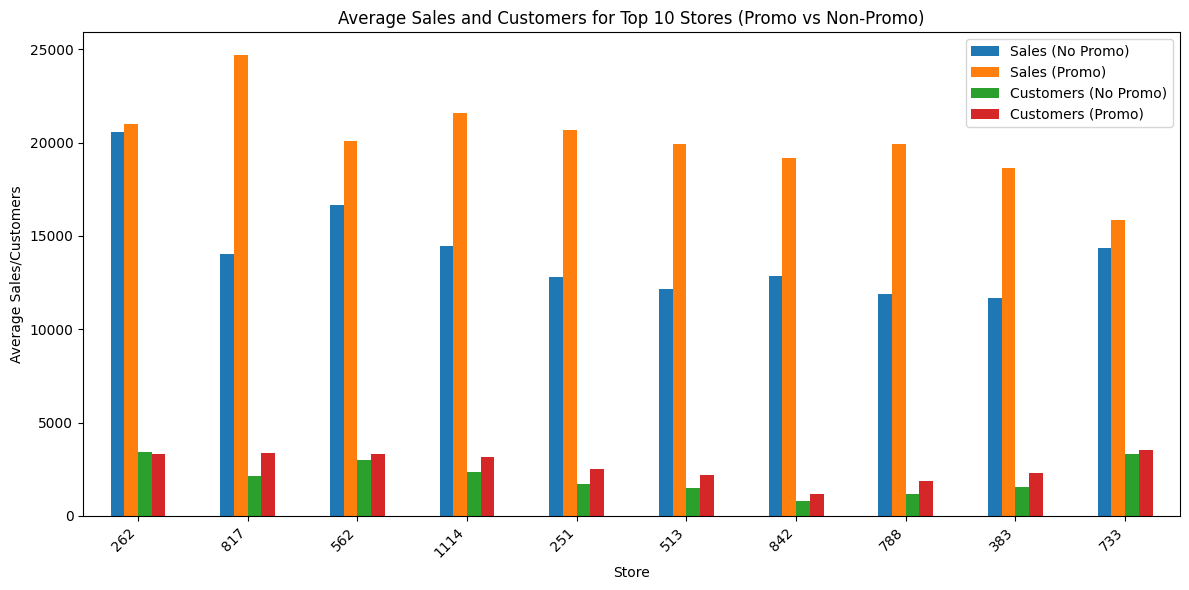

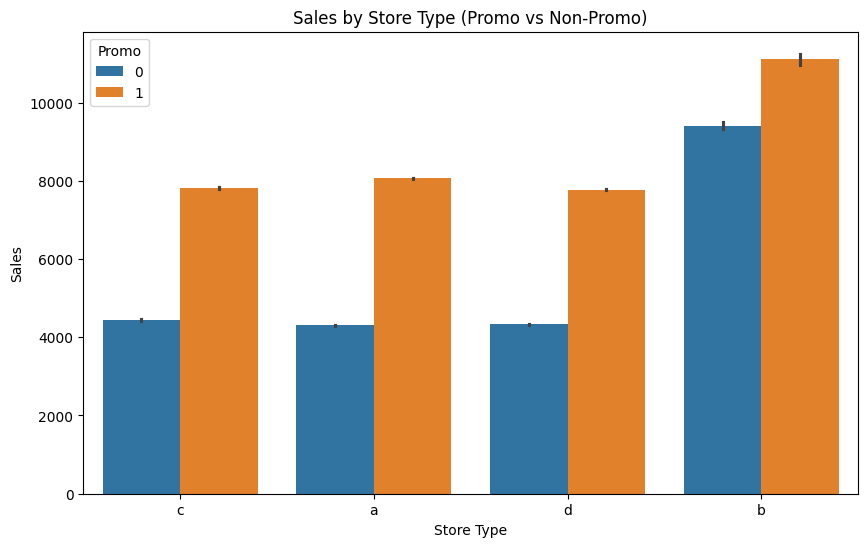


Promo Effectiveness Summary for Top 10 Stores (Sales and Customers):
                     Sales                       Customers                   
                     mean          std count         mean          std count
Store Promo                                                                 
1     0       3198.994845  2052.472060   582   399.682131   250.880900   582
      1       5152.886111  1209.962568   360   577.522222   126.158363   360
2     0       2855.058419  1893.487434   582   366.876289   246.250761   582
      1       6172.816667  1421.844953   360   678.702778   138.557644   360
3     0       3967.596220  2600.060547   582   477.445017   310.339384   582
...                   ...          ...   ...          ...          ...   ...
1113  1       7320.086111  1625.789190   360   754.250000   145.336565   360
1114  0      14477.742268  9056.011217   582  2353.958763  1455.946623   582
      1      21601.497222  4275.889591   360  3165.383333   583.396589   360
1115 

In [13]:
from rossmann_store_salesanlysis import analyze_promo_by_top_stores
# Specify the sales, customers, promo, store, and store type columns
sales_column = 'Sales'  
customers_column = 'Customers'  
promo_column = 'Promo'  
store_column = 'Store' 
store_type_column = 'StoreType'  

# Call the function to analyze the effect of promotions by store and store type
analyze_promo_by_top_stores(merged_data, sales_column, customers_column, promo_column, store_column, store_type_column)


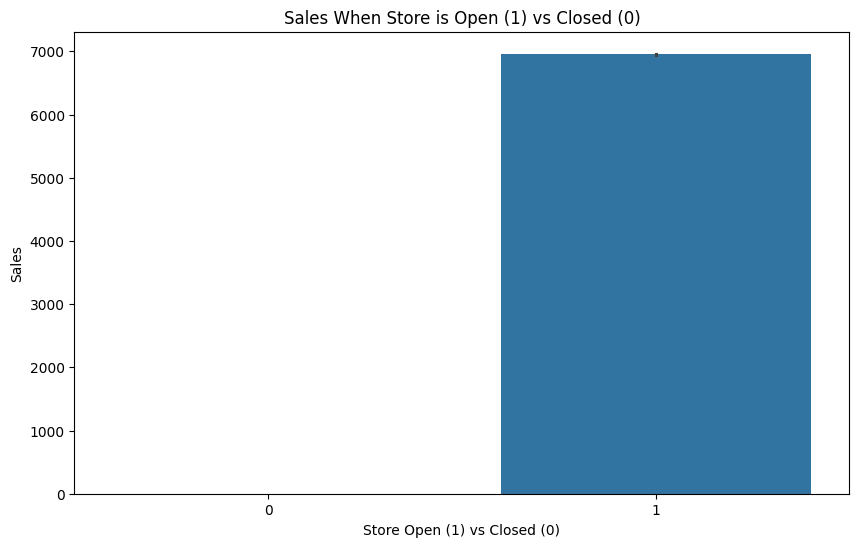

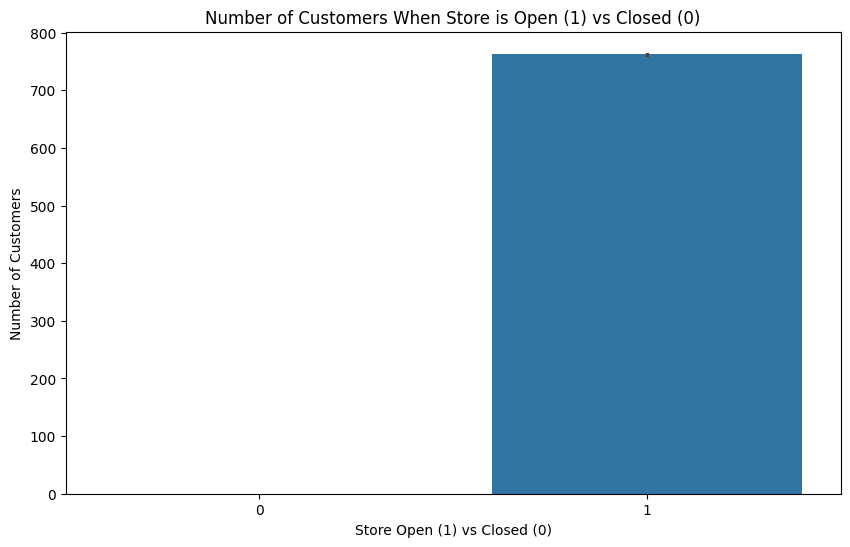

c:\Users\Naim\rossmann-store-sales\scripts\rossmann_store_salesanlysis.py:338: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df[date_column].dt.day_name(), y=customers_column, hue=open_column, data=merged_df, ci=None)


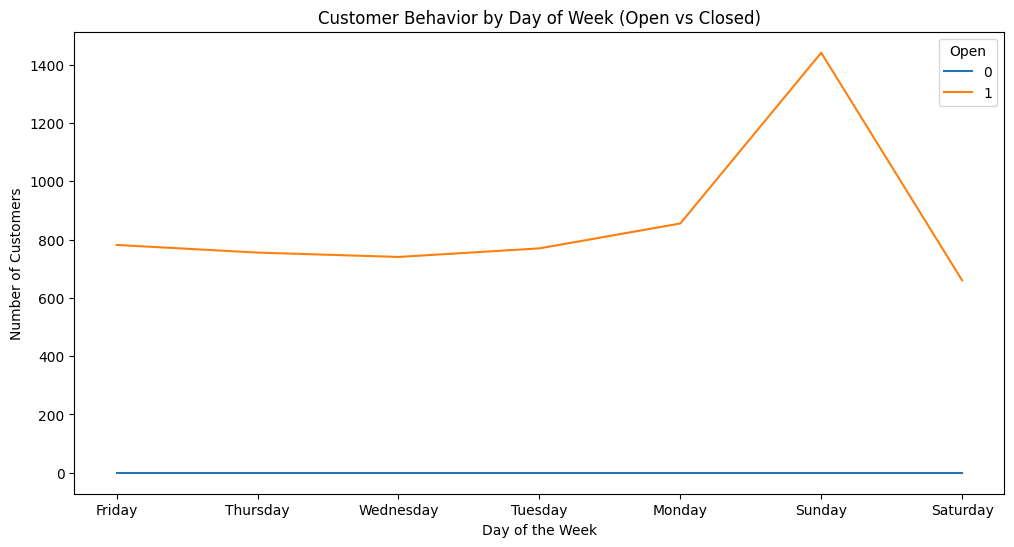

c:\Users\Naim\rossmann-store-sales\scripts\rossmann_store_salesanlysis.py:346: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=merged_df[date_column].dt.day_name(), y=sales_column, hue=open_column, data=merged_df, ci=None)


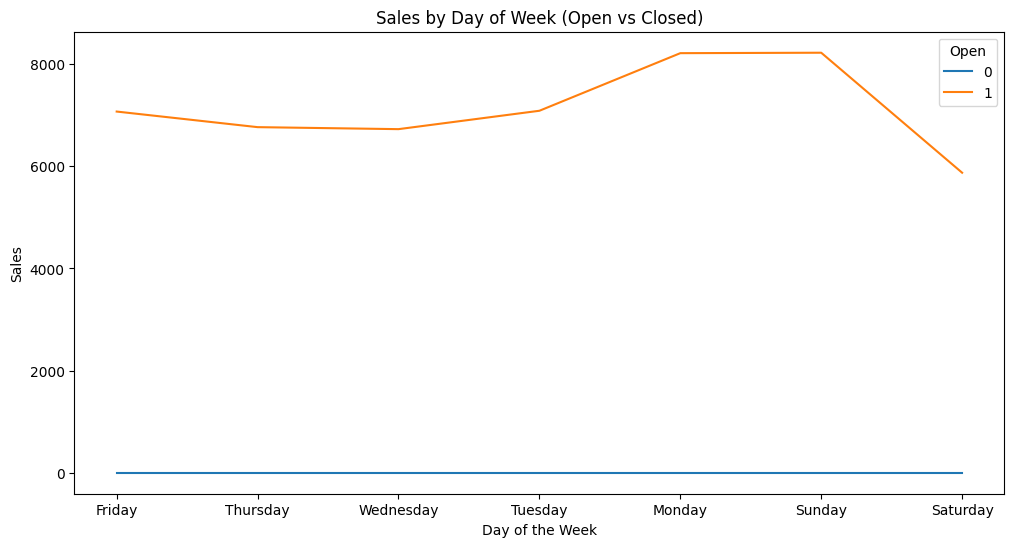


Store Opening and Closing Summary (Sales and Customers):
             Sales                               Customers                     \
             mean  median         std   count        mean median         std   
Open                                                                           
0        0.000000     0.0     0.00000  172817    0.000000    0.0    0.000000   
1     6955.514291  6369.0  3104.21468  844392  762.728395  676.0  401.227674   

              
       count  
Open          
0     172817  
1     844392  


In [14]:
from rossmann_store_salesanlysis import analyze_store_opening_closing_behavior
sales_column = 'Sales'  
customers_column = 'Customers'  
open_column = 'Open' 
date_column = 'Date'  

# Call the function to analyze customer behavior during store opening and closing times
analyze_store_opening_closing_behavior(merged_data, sales_column, customers_column, open_column, date_column)


Number of stores open on all weekdays: 1115


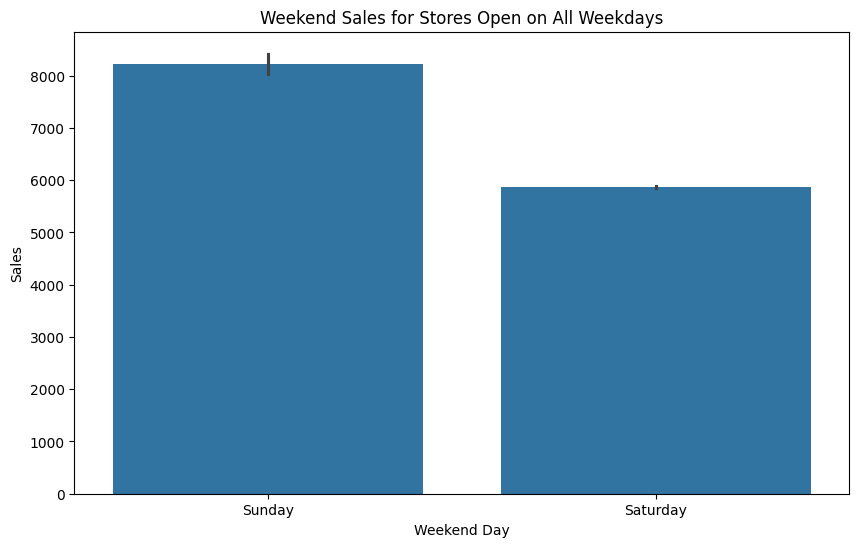


Weekend Sales Summary for Stores Open on All Weekdays:
                   mean  median          std   count
DayOfWeek                                          
Saturday   5874.840238  5425.0  2852.730426  144058
Sunday     8224.723908  6876.0  6235.152960    3593


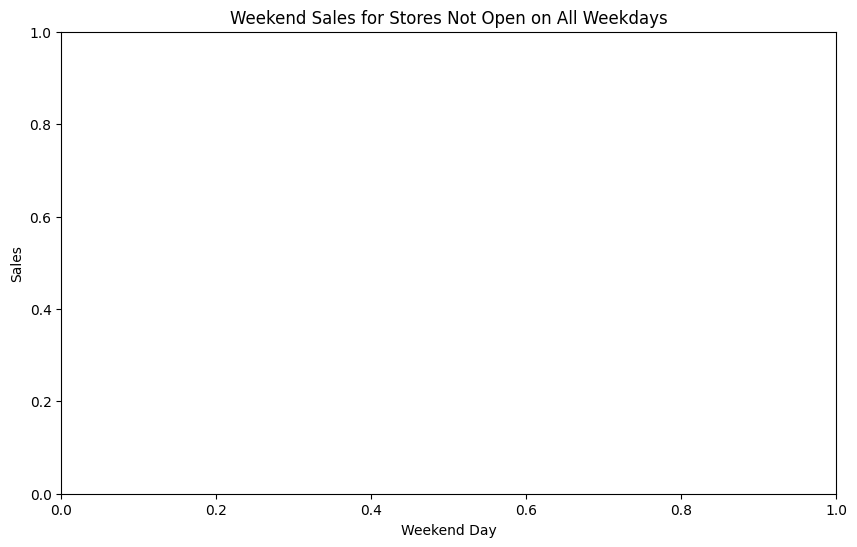


Weekend Sales Summary for Stores Not Open on All Weekdays:
 Empty DataFrame
Columns: [mean, median, std, count]
Index: []


In [15]:
from rossmann_store_salesanlysis import analyze_weekday_open_stores_and_weekend_sales

sales_column = 'Sales'  
date_column = 'Date'
store_column = 'Store'  

# Call the function to analyze stores open on all weekdays and their weekend sales
analyze_weekday_open_stores_and_weekend_sales(merged_data, sales_column, date_column, store_column)

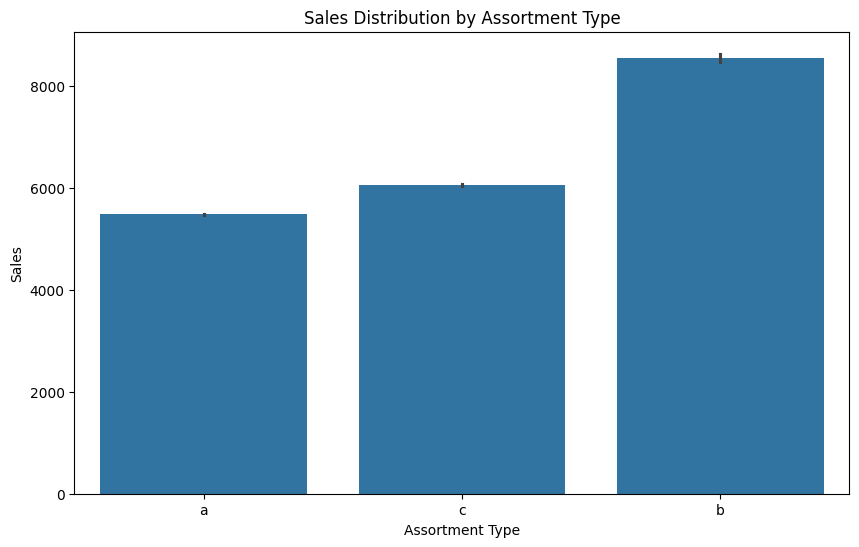


Sales Summary by Assortment Type:
                    mean  median          std   count
Assortment                                          
a           5481.026096  5463.0  3682.766186  537445
b           8553.931999  8026.5  3882.418206    8294
c           6058.676567  6039.0  3992.255662  471470


In [16]:
from rossmann_store_salesanlysis import analyze_assortment_effect_on_sales
sales_column = 'Sales'  
assortment_column = 'Assortment'  

# Call the function to analyze how assortment type affects sales
analyze_assortment_effect_on_sales(merged_data, sales_column, assortment_column)

Correlation between CompetitionDistance and Sales: -0.0189


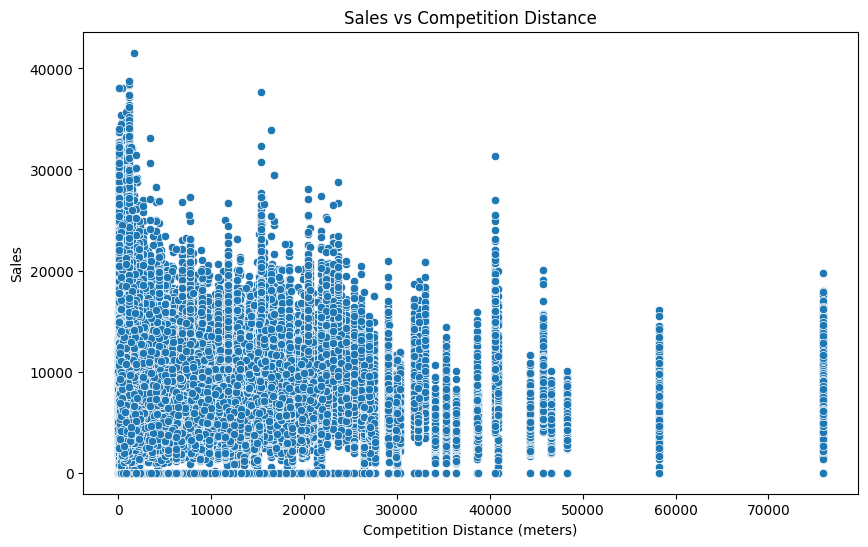

c:\Users\Naim\rossmann-store-sales\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


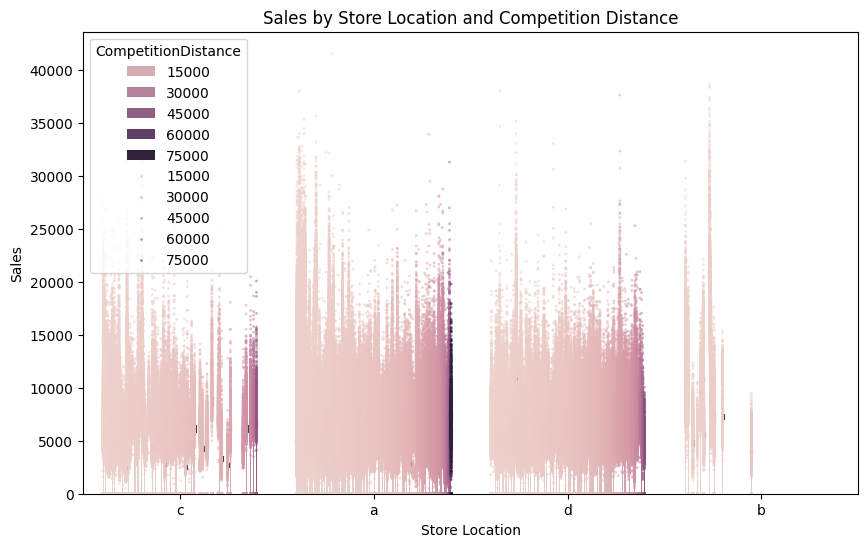


Sales Summary by Competition Distance and Store Location:
                                       mean  median          std  count
CompetitionDistance StoreType                                         
20.0                a          4861.790870  4909.0  2769.931747    942
30.0                a          4659.587470  4994.0  2548.316909   3767
40.0                a          6433.610669  6592.5  4027.832110   3768
                    c          5328.854565  5324.0  3020.138053    942
50.0                a          8178.377070  8092.0  6149.352107   4710
...                                    ...     ...          ...    ...
45740.0             c          6646.681529  6994.0  3645.377205    942
46590.0             a          3773.877919  4155.0  2032.015373    942
48330.0             d          4032.547771  4198.0  2252.230750    942
58260.0             a          6071.001062  6034.0  2674.439928    942
75860.0             a          7321.466030  7043.5  3300.545896    942

[830 rows x 4 co

In [17]:
from rossmann_store_salesanlysis import analyze_competitor_distance_effect_on_sales
sales_column = 'Sales'  # Replace with the actual column name for sales
competition_distance_column = 'CompetitionDistance'  # Replace with the column that indicates the distance to the nearest competitor
store_type_column = 'StoreType'  # Replace with the column that indicates the store's location type (e.g., city center, suburban, etc.)

# Call the function to analyze how the distance to competitors affects sales
analyze_competitor_distance_effect_on_sales(merged_data, sales_column, competition_distance_column, store_type_column)



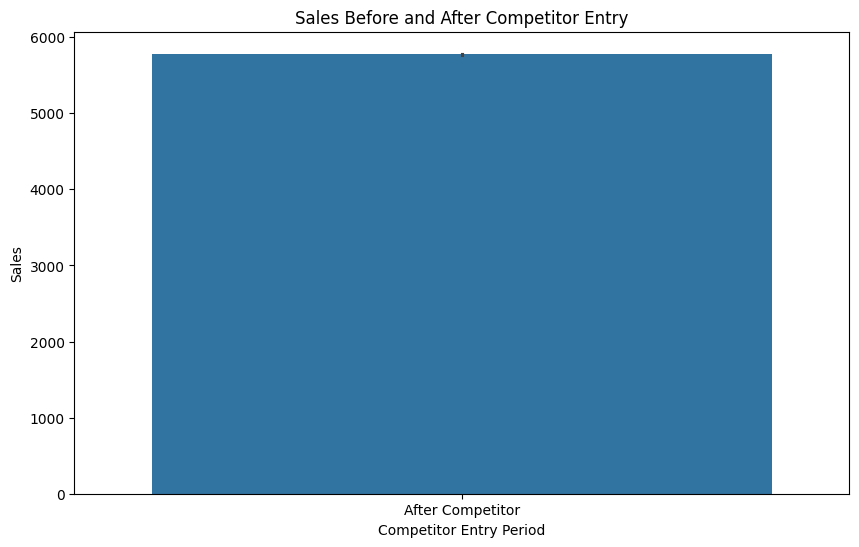

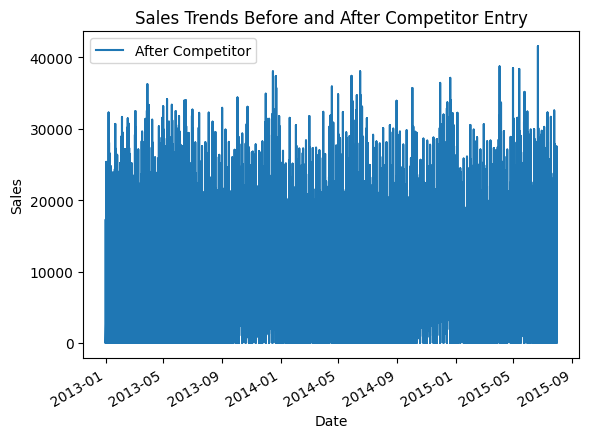


Sales Summary Before and After Competitor Entry:
                          mean  median          std    count
TimePeriod                                                 
After Competitor  5773.818972  5744.0  3849.926175  1017209


In [18]:
from rossmann_store_salesanlysis import analyze_new_competitors_effect_on_sales
sales_column = 'Sales'  
competition_distance_column = 'CompetitionDistance'  
date_column = 'Date'  
store_column = 'Store'  

# Call the function to analyze the effect of new competitors on sales
analyze_new_competitors_effect_on_sales(merged_data, sales_column, competition_distance_column, date_column, store_column)



In [19]:
# Check how many rows have NA in CompetitionDistance
na_count = merged_data[competition_distance_column].isna().sum()
print(f"Number of rows with NA in {competition_distance_column}: {na_count}")

# Check how many rows have non-NA in CompetitionDistance
non_na_count = merged_data[competition_distance_column].notna().sum()
print(f"Number of rows with non-NA in {competition_distance_column}: {non_na_count}")


Number of rows with NA in CompetitionDistance: 0
Number of rows with non-NA in CompetitionDistance: 1017209


In [20]:
# Check which stores are open on all weekdays (Monday to Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Add a day of the week column based on the Date
merged_data['DayOfWeek'] = merged_data[date_column].dt.day_name()

# Filter data for weekdays and check how many stores are open (Open == 1)
weekday_data = merged_data[merged_data['DayOfWeek'].isin(weekdays) & (merged_data['Open'] == 1)]

# Group by store to see how many weekdays each store is open
weekday_open_counts = weekday_data.groupby(store_column)['DayOfWeek'].nunique()

# Check stores open all 5 weekdays (Monday to Friday)
stores_open_all_weekdays = weekday_open_counts[weekday_open_counts == 5].index
print(f"Number of stores open on all weekdays: {len(stores_open_all_weekdays)}")


Number of stores open on all weekdays: 1115


In [21]:
# Filter data for weekends (Saturday and Sunday) for the stores open on all weekdays
weekend_days = ['Saturday', 'Sunday']
weekend_data = merged_data[(merged_data['Store'].isin(stores_open_all_weekdays)) & 
                           (merged_data['DayOfWeek'].isin(weekend_days)) & 
                           (merged_data['Open'] == 1)]

# Check if there is any weekend data
if not weekend_data.empty:
    print("Weekend data is available for stores open on all weekdays.")
else:
    print("No weekend data available for stores open on all weekdays.")


Weekend data is available for stores open on all weekdays.


In [22]:
# Check stores that are open fewer than 5 weekdays (Monday to Friday)
stores_not_open_all_weekdays = weekday_open_counts[weekday_open_counts < 5].index
print(f"Number of stores not open on all weekdays: {len(stores_not_open_all_weekdays)}")


Number of stores not open on all weekdays: 0
